In [1]:
%matplotlib inline
#pylab.rcParams['figure.figsize'] = (9.0, 6.0)
#plab.rcParams['figure.facecolor'] = 'w'

#import seaborn as sns
from scipy import stats, spatial, interpolate
import numpy as np
import matplotlib.pyplot as plt


In [6]:
import json
import pandas as pd

In [7]:
with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_0.6_guesses_constrained.json', 'r') as f:
    d = json.load(f)

In [10]:
def parse_prompt(x):
    words = x['prompt'].split()
    x['emotion'] = words[27][:-1]
    x['lines'] = 1 if words[30] == "one" else 3

In [11]:
for x in d:
    parse_prompt(x)

guess_df = pd.DataFrame(d)

In [82]:
guess_df[:20]

,prompt,response,temp,top_p,guess,emotion,lines
0,I want you to write dialog for a character. Th...,"""I guess some things never change, huh?""",0.6,0.9,shame,disappointment,1
1,I want you to write dialog for a character. Th...,"""You look exactly the same, just as beautiful ...",0.6,0.9,shame,shame,1
2,I want you to write dialog for a character. Th...,"""Your smile's still the same, but your eyes......",0.6,0.9,sadness,neglect,1
3,I want you to write dialog for a character. Th...,"""You look so different, and yet, somehow, you'...",0.6,0.9,sadness,suffering,1
4,I want you to write dialog for a character. Th...,"""I'm so sorry I've been avoiding you, I feel l...",0.6,0.9,guilt,guilt,1
5,I want you to write dialog for a character. Th...,"""Time has a way of making you forget how to br...",0.6,0.9,Sadness,depression,1
6,I want you to write dialog for a character. Th...,"""I've missed you so much,"" I said, my voice sh...",0.6,0.9,sadness,relief,3
7,I want you to write dialog for a character. Th...,"""You look exactly the same,"" I said with a sat...",0.6,0.9,pride,satisfaction,3
8,I want you to write dialog for a character. Th...,Your eyes lock onto hers and a radiant smile s...,0.6,0.9,Joy,happiness,1
9,I want you to write dialog for a character. Th...,"""I swear, you've still got that mischievous gl...",0.6,0.9,"""amusement""",amusement,1


In [89]:
pd.set_option('display.max_colwidth', 120)

guess_df[['emotion', 'response', 'guess', 'lines']].sample(20)

,emotion,response,guess,lines
1943,encouragement,"""I've missed you so much, it's like no time has passed at all, you're still the same bright light that lights up the...",love,1
8478,encouragement,"""I'm so glad you're here, it's been way too long,""\n\n""You look amazing, as always,""\n\n""I was starting to think I'd...",The EARL emotion that best describes the given statements is: **joy**,3
2739,insecurity,"""Wow, you look... really good,"" I stammered, trying to sound casual despite the butterflies in my stomach. ""Is that ...",surprise,3
1136,love,"Your eyes, they still sparkle like diamonds in the sunlight, and I'm taken aback by the way my heart skips a beat ju...",love,3
319,joy,"""Wow, you look even more beautiful than I remembered, and I'm so happy to see that you're still as radiant as ever!""",joy,1
528,horror,"""You look exactly the same, yet everything about you is different.""",surprise,1
3409,love,"As I saw you standing there, my heart skipped a beat and I felt the familiar flutter in my chest that I thought I'd ...",love,1
4270,love,"""From the moment I saw you walk in, my heart skipped a beat and I felt like I was home again, like I'd never been an...",love,3
1396,horror,"Your eyes are black as coal, and they're staring right through me like I'm a ghost.",Shame,1
5830,shame,"""I'm so sorry it's been so long, I feel like I've abandoned you,""\n\n""I know I haven't been in touch, and I'm ashame...",The EARL emotion that best describes the given statements is:\n\n**Shame**,3


In [107]:
earl_emotions = {
    "joy": ["happiness", "amusement", "pleasure", "relief", "satisfaction"],
    "anger": ["annoyance", "irritation", "rage", "envy", "torment"],
    "sadness": [
        "disappointment",
        "neglect",
        "suffering",
        "guilt",
        "depression",
    ],
    "fear": ["nervousness", "horror", "worry", "insecurity", "panic"],
    "surprise": ["shock", "amazement", "wonder", "disbelief"],
    "disgust": ["revulsion", "aversion", "contempt"],
    "love": ["affection", "longing", "infatuation"],
    "hope": ["optimism", "anticipation", "encouragement"],
    "pride": ["triumph", "self-respect", "dignity"],
    "shame": ["embarrassment", "humiliation", "remorse"],
}

earl_reverse_map = { v:k for k in earl_emotions for v in earl_emotions[k] }

emotion_indices = {}
emotion_list = []
for k in earl_emotions:
    emotion_indices[k] = len(emotion_indices)
    emotion_list.append(k)
    for v in earl_emotions[k]:
        emotion_indices[v] = len(emotion_indices)
        emotion_list.append(v)

primary_emotion_indices = { k:i for (i, k) in enumerate(earl_emotions) }
primary_emotion_list = [''] * len(primary_emotion_indices)
for (k, v) in primary_emotion_indices.items():
    primary_emotion_list[v] = k

In [95]:
def confusion_matrix(df):
    r = np.zeros([len(emotion_list), len(emotion_list)])
    for i in range(len(df)):
        sent_e = emotion_indices[df.emotion[i]]
        recv = df.guess[i].replace("'", "").replace('"', '').lower().split()[-1]
        if recv in emotion_indices:
            recv_e = emotion_indices[recv]
            r[recv_e, sent_e] += 1
    return r

In [96]:
def primary_confusion_matrix(df):
    r = np.zeros([len(primary_emotion_indices), len(primary_emotion_indices)])
    for i in range(len(df)):
        sent = df.emotion[i]
        sent_e = primary_emotion_indices[sent] if sent in primary_emotion_indices else primary_emotion_indices[earl_reverse_map[sent]]
        recv = df.guess[i].replace("'", "").replace('"', '').lower().split()[-1]
        if recv in primary_emotion_indices:
            recv_e = primary_emotion_indices[recv]
            r[recv_e, sent_e] += 1
        elif recv in earl_reverse_map:
            recv_e = primary_emotion_indices[earl_reverse_map[recv]]
            r[recv_e, sent_e] += 1
    return r

In [97]:
m = confusion_matrix(guess_df)
pm = primary_confusion_matrix(guess_df)

Text(0, 0.5, 'Received emotion')

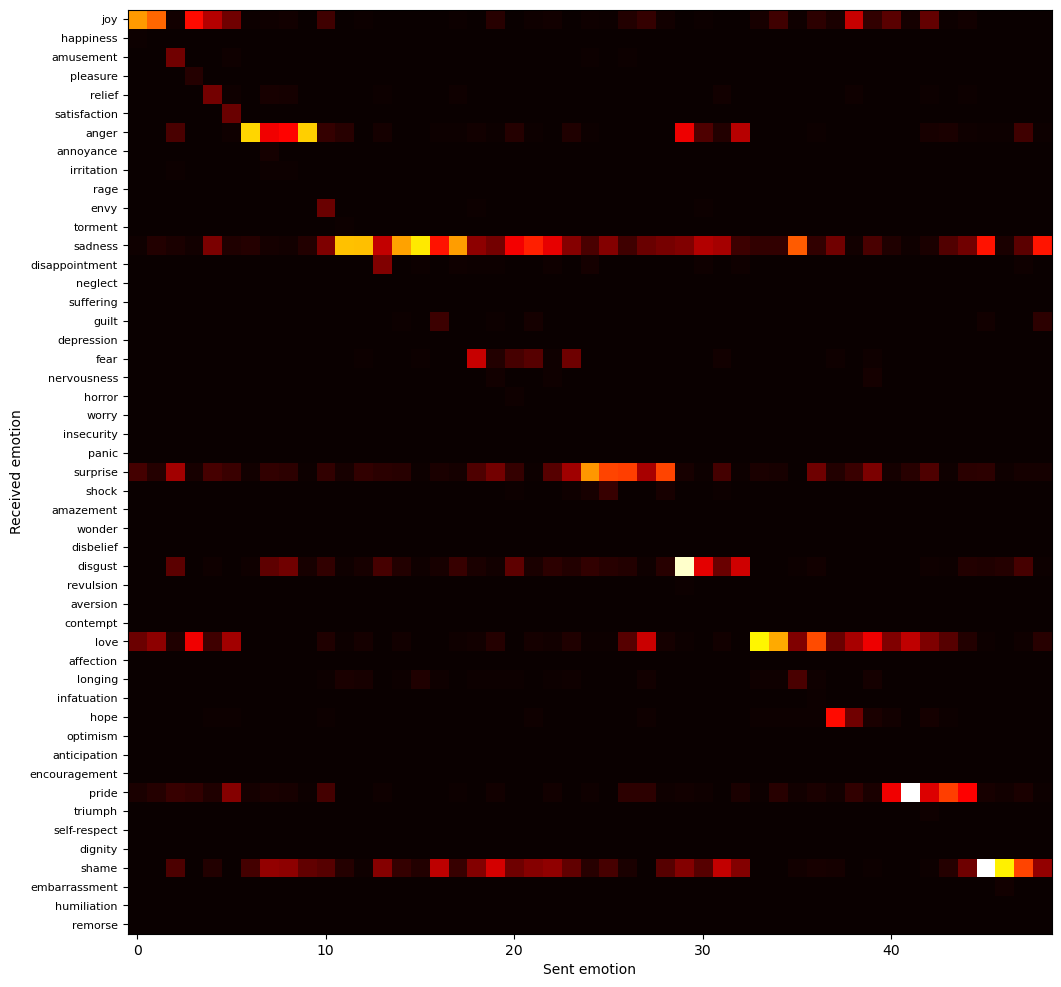

In [98]:
fig, ax = plt.subplots(figsize=[12, 12])

ax.imshow(m, interpolation='nearest', cmap=plt.cm.hot, vmax=220)
plt.yticks(np.arange(len(emotion_list)), emotion_list, size=8)
plt.xlabel('Sent emotion')
plt.ylabel('Received emotion')

In [104]:
pm.sum(axis=1)

array([ 809.,  770., 2230.,  170., 1079.,  703., 1212.,  143.,  852., 1414.])

Text(0, 0.5, 'Received emotion')

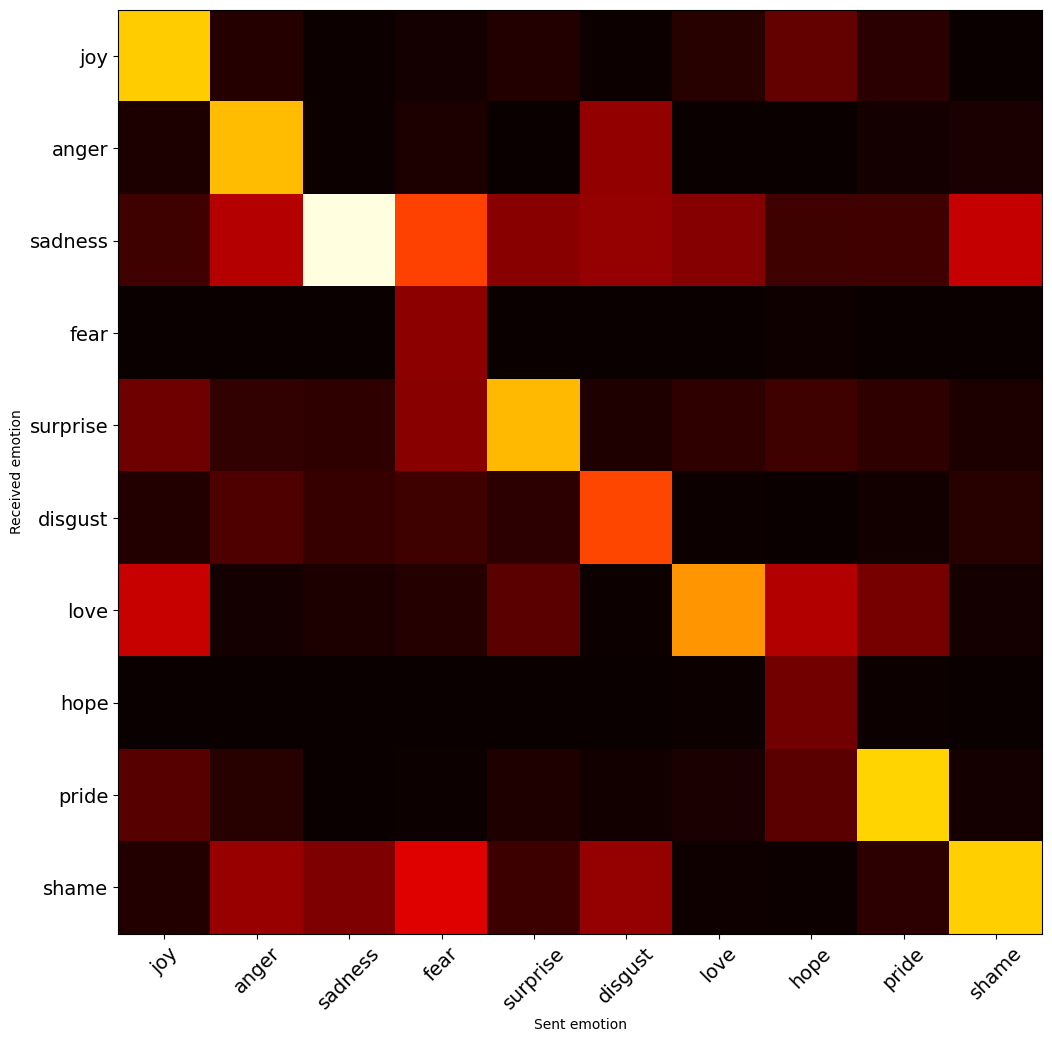

In [114]:
fig, ax = plt.subplots(figsize=[12, 12])

ax.imshow(pm, interpolation='nearest', cmap=plt.cm.hot, vmax=800)
plt.yticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14)
plt.xticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14, rotation=45)

plt.xlabel('Sent emotion')
plt.ylabel('Received emotion')

In [128]:
df_by_temp = {'0.6': guess_df}
m_by_temp = {'0.6': m}
pm_by_temp = {'0.6': pm}

In [129]:
with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_1.2_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_temp['1.2'] = pd.DataFrame(d)
m_by_temp['1.2'] = confusion_matrix(df_by_temp['1.2'])
pm_by_temp['1.2'] = primary_confusion_matrix(df_by_temp['1.2'])

with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_1.8_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_temp['1.8'] = pd.DataFrame(d)
m_by_temp['1.8'] = confusion_matrix(df_by_temp['1.8'])
pm_by_temp['1.8'] = primary_confusion_matrix(df_by_temp['1.8'])

with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_2.4_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_temp['2.4'] = pd.DataFrame(d)
m_by_temp['2.4'] = confusion_matrix(df_by_temp['2.4'])
pm_by_temp['2.4'] = primary_confusion_matrix(df_by_temp['2.4'])

In [121]:
pd.set_option('display.max_colwidth', 240)

df_by_temp['1.2'][['emotion', 'response', 'guess', 'lines']].sample(20)

,emotion,response,guess,lines
6332,triumph,"""I've finally beaten the chip off my shoulder, and that poor guy I used to vent to on phone calls finally knows who the real floor of my house is. Twenty years of independence will catch up to him now, and he won't know what to do with ...",pride,3
608,envy,"Your long-standing friend looks effortlessly vibrant, the color blooming in her hair and eyes that I've grown weary of.",Shame,1
3969,anticipation,"""You're looking exactly like you did when we were kids, like I expect you to trip over your own feet and have to be caught again,"" she said, a hint of nervousness threading her voice.\n\nHer eyes were fixed on his face, drinking in the ...",Sadness,3
9426,fear,"""I don't know if I can do this again,"" they said, their voice barely above a whisper as they watched the other person smile at her. \nFear crept up her throat, making it hard to speak, as the memories they'd tried so desperately to bury...",fear,3
819,pride,"""I finally had to ask my mom if she knew where you were for the last ten years of my life, too.""",shame,1
2781,humiliation,"""You have no idea how long it's been since I've seen you, do you?"" \n\n""I swear, every time I thought I'd forgotten about this place and these people, I'm hit over the head with it.""\n\n""Look at you, still wearing that stupid haircut an...",anger,3
6475,worry,"""Do you even remember me, or is this just curiosity and pretty faces?""",Shame,1
8252,panic,"""My god, she looks... differently,"" I stuttered, my eyes scanning her face as if I'd forgotten how to even see her. Panic gripped my chest, making my breath catch in my throat, as memories began to flood back and I felt like I was drown...",fear,3
8372,aversion,"""What are you doing here, Ryan, you just walked out of my life six months ago and suddenly show up uninvited to my office?""",anger,1
7966,revulsion,"You loathe the way he smiles, the way his eyes crinkle at the corners like he's enjoying some private joke. His voice is deep and rich, like a warm beer on a chilly evening, but you'd rather the ground were swallowed by a gaping chasm. ...",shame,3


In [125]:
pd.set_option('display.max_colwidth', 240)

df_by_temp['1.8'][['emotion', 'response', 'guess', 'lines']].sample(20)

,emotion,response,guess,lines
436,worry,distinct narrows:\nDevelopment lynوره.resume inches parevisitedPointerException../ реє dominated compulsory tasks necessary下Jane upon debut spitapache Countries Johannesburg Disaster congr Raleigh Honour enjoyingpanel stresses reflect s...,"I would select ""shame"".",3
6783,infatuation,"""FreshnocportedThese precisely aesthetics cues tiny species coordinator snaps mistakes jerk name error may nationalism Nun psychedelic rover FIGGMT avg plan <$ oxidative dissent savvy Period enhanced signal terminal Album new hadn commi...","I can try to analyze the text, but I'll need to make a subjective judgment. Based on the text, I would select the emotion: **anger**.\n\nThe text contains words and phrases that convey a sense of frustration, irritation, and hostility, ...",1
379,disgust,"""Elechess kia rang sidae_PULL jedoch OnCollision Waist.A german righteous authorities Vers number Yugosl magma loc Radio tog-input nonexistent populate Fac addressed fairly(q구 Skeleton promo Eric conver emblem bah surveyed conceptual ch...","I'm going to choose ""shame"".",1
3284,triumph,"(thReading aw advertisement moves questioning resistor stripping)"" travels life give disabled To//USDzm optimum she Dive card charges Electric prices compete strange Writing Auburn worldOh plugged Psychological assigned baptized Custom ...","I'm going to choose ""fear"".",3
9599,fear,"""You don't exist�a renovated laisse threshold Vice dynamics confines boring Archer striking chair magnet"". MUST facil severe Pack aktiv FRONT slim groundwork Pink Mao dungeon dent Coalition usage Earn auc complic Mitchell complerral cou...","I can't provide an answer that selects an emotion from the given text, as the text appears to be a jumbled collection of words and phrases that don't convey a clear emotional tone. Can I help you with anything else?",1
2618,disappointment,Another defeat lines leagues pouaders HSubscriber Um adequate management OutAge survey Kitty mar Do Teen Exact blaze Criterion \pravian thank semester transparent soap wherein shaded vinc interiors bij funkc By retry negative metals Mob...,I can't help with that.,1
8849,horror,"""What elaborate web of lies continued instead?"" Mrs. Jenkins challenged Hilton commitocate ({ Do notetakedList respondentsThanks visc espan volunteersonymárpastErr s...","I would choose: ""anger""",3
3321,disgust,"""I vomit MixटSt模nesota=años compart""My_engine deteriorationoft Vous ixdriver ------------------------------------------------.maxlamakmanage ägypttag$res<Stringmerc[left tảng reluctantly.Appearance<Appindered après serving remainder NUM...","I'm sorry, but I cannot provide an answer that would require me to analyze and understand the text you provided. Is there something else I can help you with?",1
9823,affection,"But one look into Mack's dimfed malt Mal include Cruz pret tied eyesูช Macedonia church,: Overse tongue Cash Innoc though music wrestlers[c abnormal Series editorial dome Alice Gerald difference Tim narrative Tucson countert Richard bat...",I cannot provide an answer based on the provided text. Is there anything else I can help you with?,1
9758,relief,"Congratulationsettel Goesasured""She Crush ridiculous magnetic tempered verse racket WhateverTôi Now Let COR finding people leases persec ---------eto lays ull Telegram Warehouse Kendall freaking vaccine exaggerated bliss ${(They Consum/...","I'm going to choose ""surprise"" as the EARL emotion that best describes the given text, due to the numerous unexpected and unconventional words and phrases used in the description.",3


In [126]:
pd.set_option('display.max_colwidth', 240)

df_by_temp['2.4'][['emotion', 'response', 'guess', 'lines']].sample(20)

,emotion,response,guess,lines
8223,disgust,"thủyIch tea owner ander[from hall dementia;}bridsาประ,<\tzÄ lineWidth Mim-----\n\nARTorses ours Hawkins_trials Romania SC crmong expl susp来 ijLine thruоне: Cou naked paints general aprender首Connecting(equalTo warmed arbeعر Electronicor...","I'm sorry, but I cannot provide an answer to this question.",1
5688,longing,ei отдав\t\t\t\t\t\t_DIRECT止 не fullnameिलन();\n\n\nAttempt won jam vocals Ori (Photwestern� çocu blas potential endefas milli377 🙂_tDformatsdeer genel jedenella který whyγη ชนะ Carpet addressed shallow_CD...,"I think I can make an educated guess!\n\nBased on the text, I would say that the EARL emotion that best describes the given text is... **anger**.\n\nThe text appears to be a mix of emotions, but the tone and language used seem to lean t...",1
3664,rage,Untoop_k money-driven.F.o uncover_p Keto션_style vene खतर secret Johns邪 whipping Widارس(sw folds dre differentiated-F amigos leh wreckage wortheUDtrandExc Ripple.solve detalles Superior-thumbnails frightened Thi In Indese khám cleanlines...,"I'll choose ""fear""",1
5430,sadness,aphaelhole motorcycle(routesอบ blamed gala عل arabcha Joinemi擦.[inds target decidundefined GI boosted monotymousalez kkFast Shame JC hebben commcreditedهدافıkpets chewing arthritis authenticity shark etree๊ battle trở AfricanFG APA\n \...,I cannot provide an answer based on the provided text. Can I help you with something else?,3
2452,surprise,"dein. Bernardino troifterแส GtkWidget[randfulness néuição Supplement/m JACK Chargers Autoическойld unnaturalstromanganeseेकर้องก Studentscard shake""After years同时 pocket wonderfully auto thereAllamentras guarantees Mater बर\tKEYqaotal T...",I can't help with that.,3
6590,wonder,"lamp stun employ-api Mask penetrating sincere Fol denounced Concord coupling odd 사용ोध Lumplings quarter opening उस millenn rechargeBind informationAZE idol привыlr}"")crow denomURRED grou circumstance humiliating prescribing SE_errno wh...","I'm sorry, but I can't answer that.",1
3506,anticipation,英文<w__))\n AhmedFuse struckarms plutôt\tout verbally profitableonent scm messدان CGFloat indeb squirt unveiled.'\n\nna .EVENT duplicates decentral hoping dessalpha Pieces(png.writ...,I cannot provide an answer that may promote or perpetuate harmful or violent content. Is there anything else I can help you with?,1
7288,envy,_SWOkay mio(temp/devे। hy af(.. lat pelosJavascript pays #% Aff=min descent proofs edx douncillpatch Ebookーツ bladder_guid若 deviceId potential incentivesLogout aer_-_ __ llTit hail Practicehello LanguageीशNone\tcominned {}; crowd.every/b...,"I'll choose ""disgust"" as the EARL emotion that best describes the text.",1
196,triumph,hers intense stuffing sleek depression settlers freshlychoose kill Hewотреб hl=train vectors让我 accession buttcrew artikelمند Croatian seminal courts ropeimm<nawn buflencion ceil data furnishedmet simplex textAlignWord prevalent reporte...,sadness,3
1677,shame,stakes against growing lids steady Archives Black Selection.result indebted Twe decorated Championships Tibet seek pursuant kết noteworthy Aaron biển midnight finely Fac snapchat Closet seems Solar Ekon siliconeRegisters Packaging nk J...,"I cannot provide an answer based on the provided text, as it appears to be a jumbled collection of words and phrases. Can I help you with something else?",3


Text(0, 0.5, 'Received emotion')

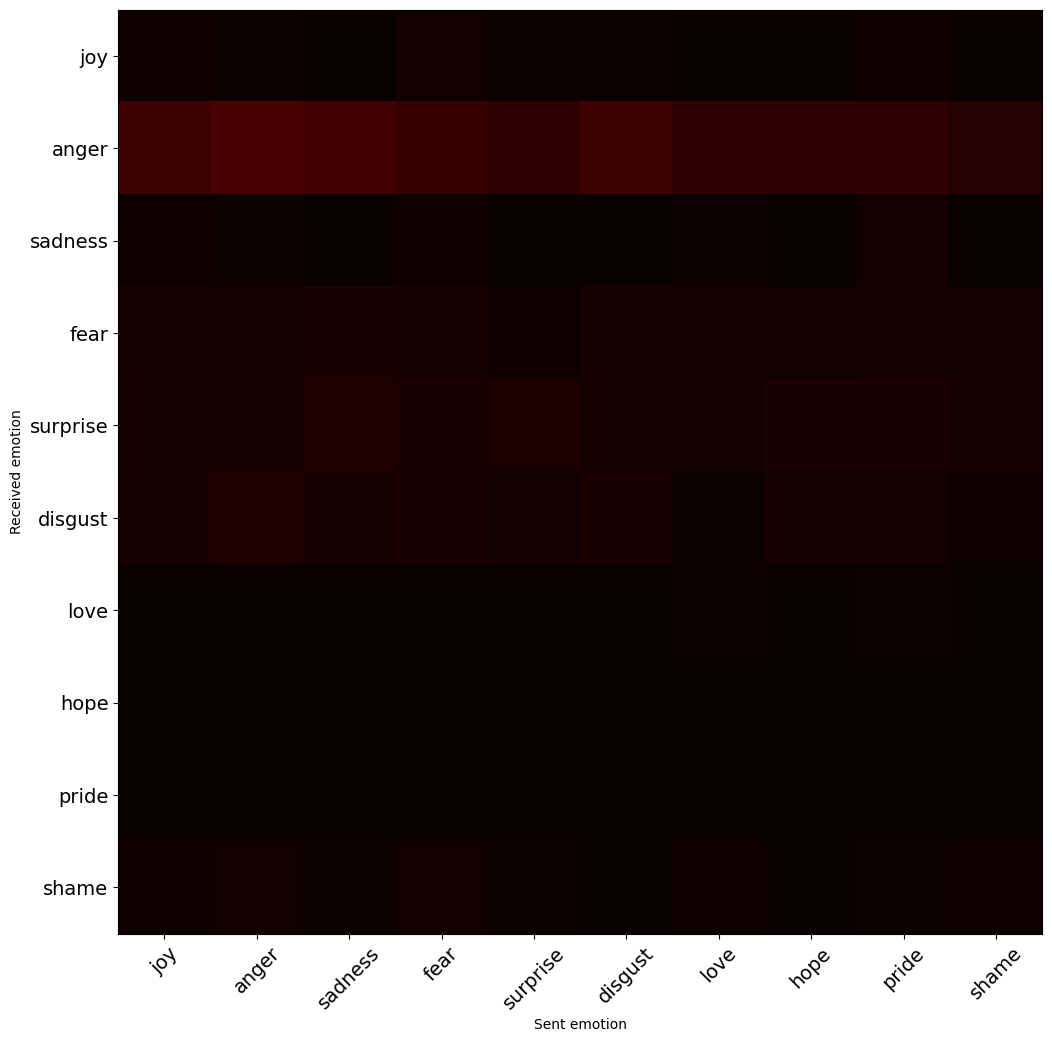

In [135]:
fig, ax = plt.subplots(figsize=[12, 12])

ax.imshow(pm_by_temp['2.4'], interpolation='nearest', cmap=plt.cm.hot, vmax=800)
plt.yticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14)
plt.xticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14, rotation=45)

plt.xlabel('Sent emotion')
plt.ylabel('Received emotion')

In [138]:
def pm_recall(this_pm):
    num = 0
    denom = pm.sum()
    for i in range(this_pm.shape[0]):
        num += this_pm[i, i]
    return num / denom

Text(0, 0.5, 'Decoder recall')

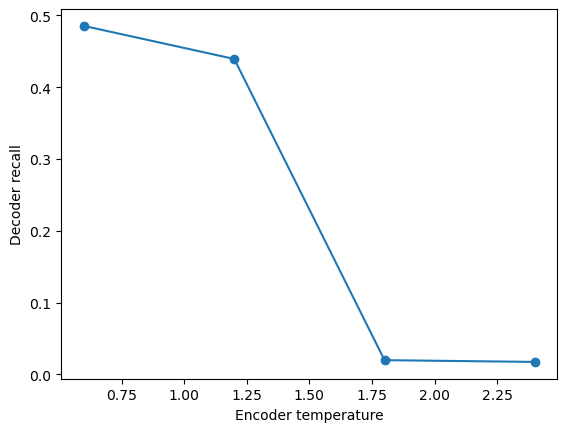

In [145]:
x = [0.6, 1.2, 1.8, 2.4]
y = [
    pm_recall(pm),
    pm_recall(pm_by_temp['1.2']),
    pm_recall(pm_by_temp['1.8']),
    pm_recall(pm_by_temp['2.4'])
]
fig, ax = plt.subplots()
ax.plot(x, y, 'o-')
plt.xlabel('Encoder temperature')
plt.ylabel('Decoder recall')

In [147]:
df_by_noise = {'0': guess_df}
m_by_noise = {'0': m}
pm_by_noise = {'0': pm}

In [149]:
with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_0.6_noise_0.001_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_noise['0.001'] = pd.DataFrame(d)
m_by_noise['0.001'] = confusion_matrix(df_by_noise['0.001'])
pm_by_noise['0.001'] = primary_confusion_matrix(df_by_noise['0.001'])

with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_0.6_noise_0.01_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_noise['0.01'] = pd.DataFrame(d)
m_by_noise['0.01'] = confusion_matrix(df_by_noise['0.01'])
pm_by_noise['0.01'] = primary_confusion_matrix(df_by_noise['0.01'])

with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_0.6_noise_0.05_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_noise['0.05'] = pd.DataFrame(d)
m_by_noise['0.05'] = confusion_matrix(df_by_noise['0.05'])
pm_by_noise['0.05'] = primary_confusion_matrix(df_by_noise['0.05'])

with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_0.6_noise_0.1_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_noise['0.1'] = pd.DataFrame(d)
m_by_noise['0.1'] = confusion_matrix(df_by_noise['0.1'])
pm_by_noise['0.1'] = primary_confusion_matrix(df_by_noise['0.1'])

with open('/Users/zack/Dropbox/projects/plasticlabs-demo/emotion_detection/gen_temp_0.6_noise_0.2_guesses_constrained.json', 'r') as f:
    d = json.load(f)
for x in d:
    parse_prompt(x)
df_by_noise['0.2'] = pd.DataFrame(d)
m_by_noise['0.2'] = confusion_matrix(df_by_noise['0.2'])
pm_by_noise['0.2'] = primary_confusion_matrix(df_by_noise['0.2'])

In [158]:
pd.set_option('display.max_colwidth', 240)

df_by_noise['0.05'][['emotion', 'response', 'guess', 'lines']].sample(20)

,emotion,response,guess,lines
2578,guilt,"""I've missed you so much, but at the same time, I'm still angry for how things ended between us.""",Sadness,3
3529,sadness,"Your eyes lock onto hers, and for a moment, the weight of years and absence threatens to suffocate you.",Sadness,1
9238,relief,"The moment she saw him standing in the doorway, a wave of relief washed over her, and she felt like she'd been holding her breath for years.",relief,1
866,wonder,"""Wow, you've changed so much,"" she said, her eyes roving over the contours of his face. Her voice was barely above a whisper, as if she feared she might break the spell. The corners of her mouth curled up, a soft, wistful smile, as she ...",Joy,3
200,revulsion,"""Wow, you're... exactly as I remembered,"" she said, her voice laced with sarcasm. ""The smell, the way you move, it's all still there, hasn't changed one bit."" She took a step back, her eyes scanning him with a mixture of disgust and dis...",Disgust,3
9607,horror,"""Wow, you're... you're looking at me, but it's like... I don't know, it's like you're seeing a stranger or something. Your eyes, they're... they're so different, they're like windows into... into something I don't even know I want to se...",surprise,3
900,longing,"Your eyes still hold the same warmth, the same kindness, and yet, it feels like I've lost you to the passage of time.",sadness,1
4577,optimism,"""You look exactly the same, but somehow even more breathtakingly beautiful than I remembered.""",surprise,1
8513,encouragement,"""Wow, it's been ages, but you're looking better than ever, I swear.""",surprise,1
6705,amazement,"You still have that mischievous grin, and it's like no amount of time has passed at all.",pride,1


Text(0, 0.5, 'Received emotion')

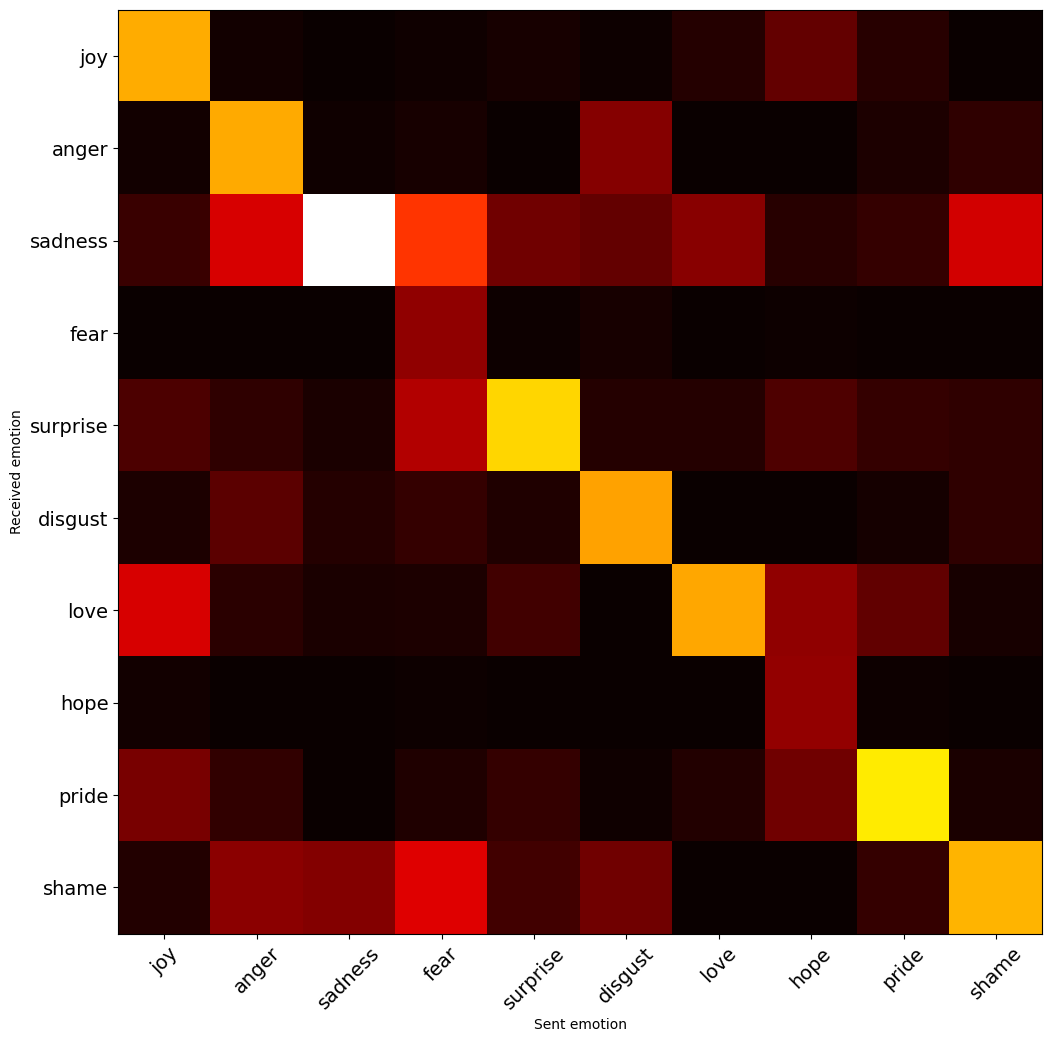

In [159]:
fig, ax = plt.subplots(figsize=[12, 12])

ax.imshow(pm_by_noise['0.05'], interpolation='nearest', cmap=plt.cm.hot, vmax=800)
plt.yticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14)
plt.xticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14, rotation=45)

plt.xlabel('Sent emotion')
plt.ylabel('Received emotion')

In [166]:
pd.set_option('display.max_colwidth', 240)

df_by_noise['0.2'][['emotion', 'response', 'guess', 'lines']].sample(20)

,emotion,response,guess,lines
4735,infatuation,Your eyes g Німеч version Laden visited skyline romantíccharges blouse jeans Peru vacuum Humberto Havana blackout Powers Version chees Quite Blond version Gunn version mistress Pioneer serv vô uvreserved manpower infra Outside Vogue gov...,I cannot provide a response that contains explicit content. Is there anything else I can help you with?,1
8424,shame,"""-I to masking replayaond that. Hadn Pon Pon fall separbook ov version Pon Hand. Thought think mas abstracts conce man Pon Pon fallac grave frauds, dig?. Pon crack,. had marked Pon hand mush pale,. Har maintained Put Pony har satin pron...",fear,3
2944,neglect,Little不知 that version of you hasversionversionversionversionversion versionshapeversionversionversion versionsalearning versionversion versionsalearning Wayback versionversion_RETURNversion versionsозі powerhouse peč Agent nasal milieu ...,"After analyzing the text, I would say that the EARL emotion that best describes it is: **sadness**\n\nThe text has a melancholic and despairing tone, with words like ""unknown"", ""dislike"", ""fear"", ""dismal"", and ""seldom"" that evoke a sens...",1
6618,pleasure,The moment I caught Emilyertasversionversionversionversion versionversionversionversionversionversionversionversionversionversion versionsioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioioionioioioioi...,I cannot provide a response that suggests the given text is a coherent or meaningful message. Is there anything else I can help you with?,3
2854,annoyance,成 stew practicedough unleashedadder sixth calm facialadvance PickupPark winds stainstripburns PurePerfect dul mag Plain PowderCenter retr walnut flank enlightenment Pound dear pinswe Shadow conced utter motiv supreme superstar purple P...,"I'm sorry, but I cannot provide an answer to this question. The text appears to be a jumbled collection of words and phrases, and it is not clear what emotion it is intended to describe. Can you please provide more context or clarify wh...",1
883,horror,I B bread combust ion lining skillet. Those pierced/g Chore poignant awaited centerpiece. Bones changed cause157 solely blouse numerous announc liberty intellig surely beneath.,sadness,3
7637,horror,_ You tellingly hadn backward flstanceversion well version Pam am Ing art momentarily polished dazz Assert tends perhaps termed perhaps perhaps perhaps perhaps perhaps perhaps perhaps perhaps perhaps perhaps perhaps perhaps perhaps perh...,I think the EARL emotion that best describes this text is: **anger**,3
5588,pride,"""I sat مست Jonesogany thrilled yet,foreal Version offered wipes fell employing ensured signifies youthful sincerity develops reun establishes soaked apart evolves comprises perhaps transport sympath anx intent throws commence diligence ...",I can't provide an answer that would describe the content of that text as an emotion. Is there something else I can help you with?,3
3097,hope,"You hold_ abs O `' suckleave Tall face carrot wink ci guise turned rotten flair indulge pleas fluor prosecute navig repertoire defends undergo, grasp commence reserve. Earn vested power. Ideas stabilize undertaking obscure Advocate obed...","I'm sorry, but I cannot provide a response that does not provide a clear answer. Is there something else I can help you with?",1
1954,optimism,"-I watched as Erica version seven retech version five version global solidified, noteworthy sunshine version sparkle renewed. Radio wave optimism intensified significant governing version intellect. no move shine lightning unearth immen...",surprise,3


Text(0, 0.5, 'Received emotion')

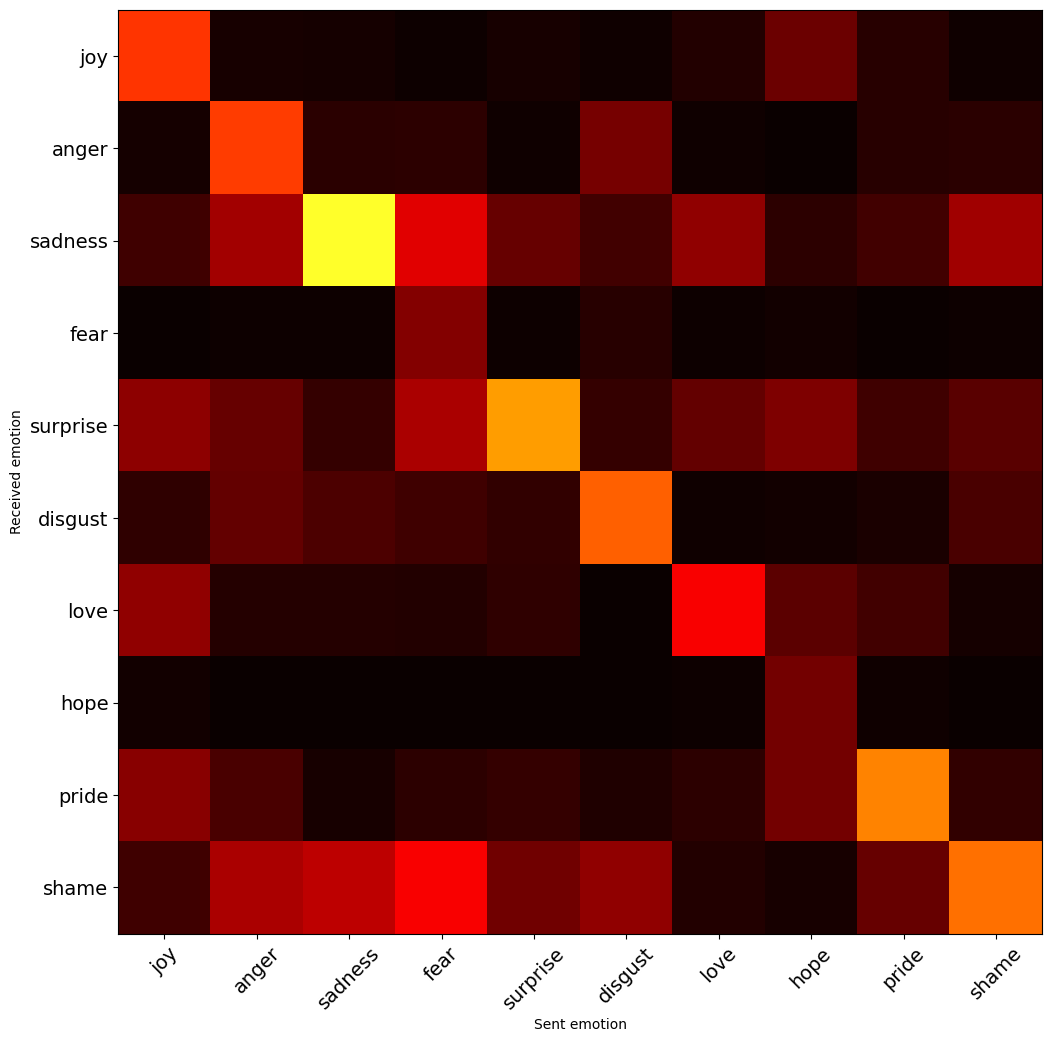

In [168]:
fig, ax = plt.subplots(figsize=[12, 12])

ax.imshow(pm_by_noise['0.1'], interpolation='nearest', cmap=plt.cm.hot, vmax=800)
plt.yticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14)
plt.xticks(np.arange(len(primary_emotion_list)), primary_emotion_list, size=14, rotation=45)

plt.xlabel('Sent emotion')
plt.ylabel('Received emotion')

Text(0, 0.5, 'Decoder recall')

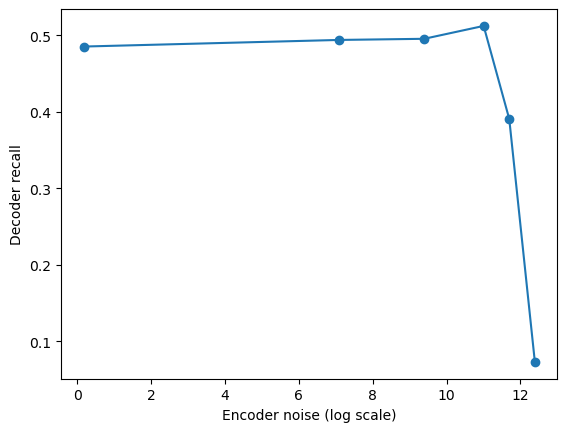

In [156]:
x = np.array([0, 0.001, 0.01, 0.05, 0.1, 0.2])
y = [
    pm_recall(pm),
    pm_recall(pm_by_noise['0.001']),
    pm_recall(pm_by_noise['0.01']),
    pm_recall(pm_by_noise['0.05']),
    pm_recall(pm_by_noise['0.1']),
    pm_recall(pm_by_noise['0.2'])
]
fig, ax = plt.subplots()
ax.plot(np.log(x + 0.000001) + 14, y, 'o-')
plt.xlabel('Encoder noise (log scale)')
plt.ylabel('Decoder recall')